In [16]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def linear_regression(df: pd.DataFrame, x: str, y: str, labelx: str, labely: str, title: str) -> None:
    # Realiza la regresión lineal
    model = sm.OLS(df[y], sm.add_constant(df[x])).fit()
    
    # Imprime un resumen del modelo
    print(model.summary())
    
    # Extrae los coeficientes del resumen del modelo
    coef = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]['coef']
    
    # Calcula la media de la variable dependiente y
    y_mean = df[y].mean()
    
    # Crea un gráfico de dispersión y agrega la línea de regresión
    df.plot(x=x, y=y, kind='scatter')
    plt.plot(df[x], coef.values[1] * df[x] + coef.values[0], color='red', label='Regression Line')
    
    # Etiquetas y título
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)
    
    # Muestra la leyenda y el gráfico
    plt.legend()
    plt.show()

# Carga los datos desde un archivo CSV
data = pd.read_csv('dataSet\MoviesDataSet.csv')



                            OLS Regression Results                            
Dep. Variable:         SumaVentasAnio   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     133.9
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.97e-19
Time:                        18:10:21   Log-Likelihood:                -476.15
No. Observations:                  91   AIC:                             956.3
Df Residuals:                      89   BIC:                             961.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4050.2078    354.044    -11.440      0.0

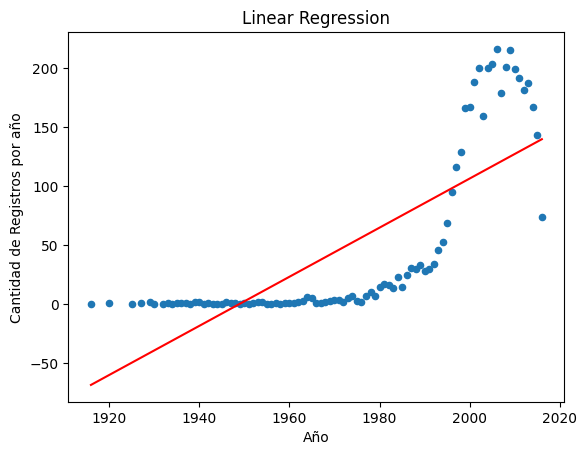

In [13]:
# Agrupa los datos por año y cuenta la cantidad de registros por año
data_anio = data.groupby(['title_year']).agg(SumaVentasAnio=('gross', 'count')).reset_index()
data_anio.reset_index(inplace=True)

# Llama a la función de regresión lineal con los datos agrupados
linear_regression(data_anio, "title_year", "SumaVentasAnio", 
                  "Año", "Cantidad de Registros por año", "Linear Regression")

                            OLS Regression Results                            
Dep. Variable:         SumaVentasAnio   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     156.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           2.83e-21
Time:                        18:10:30   Log-Likelihood:                -2080.8
No. Observations:                  91   AIC:                             4166.
Df Residuals:                      89   BIC:                             4171.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.991e+11   1.61e+10    -12.351      0.0

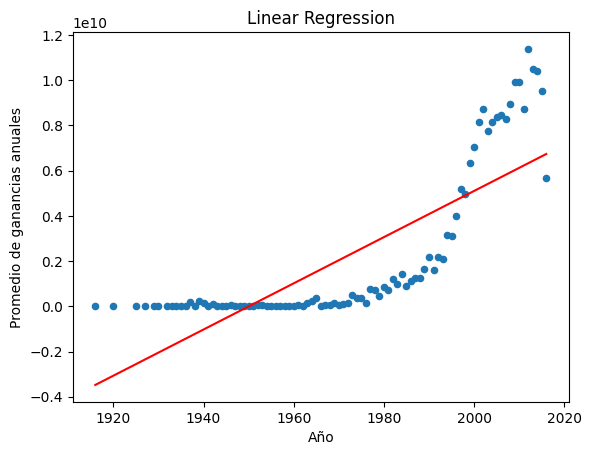

In [14]:
data_anio = data.groupby(['title_year']) .agg(SumaVentasAnio=('gross', 'sum')).reset_index()
data_anio.reset_index(inplace=True)
linear_regression(data_anio, "title_year", "SumaVentasAnio", 
                  "Año", "Promedio de ganancias anuales", "Linear Regression")

                                OLS Regression Results                               
Dep. Variable:     PromedioCalificacionAnual   R-squared:                       0.442
Model:                                   OLS   Adj. R-squared:                  0.436
Method:                        Least Squares   F-statistic:                     70.47
Date:                       Wed, 22 Nov 2023   Prob (F-statistic):           6.70e-13
Time:                               18:10:49   Log-Likelihood:                -64.786
No. Observations:                         91   AIC:                             133.6
Df Residuals:                             89   BIC:                             138.6
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

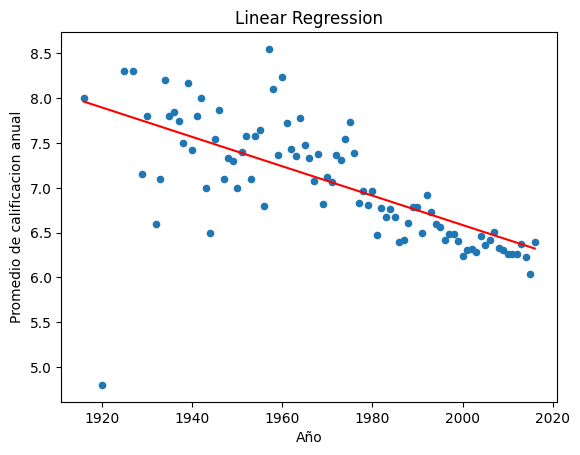

In [15]:
data_anio = data.groupby(['title_year']) .agg(PromedioCalificacionAnual=('imdb_score', 'mean')).reset_index()
data_anio.reset_index(inplace=True)
linear_regression(data_anio, "title_year", "PromedioCalificacionAnual", 
                  "Año", "Promedio de calificacion anual", "Linear Regression")